## Hatched map plot showing correlation (Pearson's r values) between SM-LG and interpolated freeboard for full 2010-2020 period

just plotting freeboard and SM-LG timeseries against eachother

In [1]:
import numpy as np
from scipy.stats import pearsonr
import datetime
import pandas as pd
from scipy.stats import linregress
from netCDF4 import Dataset
from scipy.interpolate import griddata
import os
import warnings
import itertools
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import tqdm
warnings.filterwarnings("ignore")

## CS2_CPOM

In [2]:
days = np.arange(0,4018)
dates = [datetime.date(2010,1,1)+datetime.timedelta(days=np.int(days)) for days in days]

# import snow data
snow = np.load('/Users/carmennab/PhD/OI_PolarSnow/SnowModelLG/SM_snod_combined_regridded.npy')
x_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/SnowModelLG/new_x_WG.npy') # load Will's grid, 160 x 160 array
y_WG = np.load('/Users/carmennab/PhD/OI_PolarSnow/SnowModelLG/new_y_WG.npy')

# import CS2_CPOM data
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/CS2_CPOM/'
all_fbs_cpom = np.full((4018,160,160), np.nan)
for day in tqdm.tqdm(days):
    date = dates[day].strftime('%Y%m%d')
    for f in os.listdir(datapath):
        if 'FB_interp' in f:
            if date in f:
                all_fbs_cpom[day] = np.load(datapath+str(f))
            else: 
                pass

100%|██████████████████████████████████████| 4018/4018 [00:17<00:00, 235.49it/s]


In [3]:
# pickle.dump((all_fbs_cpom, snow),open('cache1.p','wb')) # cache data so far so if kernel breaks we dont have to reload data                                                        
# (all_fbs_cpom, snow) = pickle.load(open('cache1.p','rb'))

In [4]:
# calculate r for full timeseries per grid cell

rs = np.full((160,160), np.nan)
n_valid = np.full((160,160), np.nan)

for i, j in tqdm.tqdm(itertools.product(np.arange(160),
                              np.arange(160))):  
    
    mask = ~np.isnan(all_fbs_cpom[:,i,j]) & ~np.isnan(snow[:,i,j]) # mask out cells with nan snow or nan freeb
    
    if np.count_nonzero(np.nan_to_num(mask)) > 2: # if more than 2 days in snow and freeb have data then continue
        
            
        rstats = pearsonr(all_fbs_cpom[:,i,j][mask],snow[:,i,j][mask]) # correlate valid snow and freeb for each grid cell 
        r = np.round(rstats[0],decimals=2)
        rs[i,j] = r
        n_valid[i,j] = len(mask[mask]) # number of valid days in time series - where mask is true 

25600it [00:03, 8014.53it/s] 


Text(0.5, 1.0, 'Correlation between SM-LG and CS2_CPOM interpolated freeboards (daily means) for full 2010-2020 period')

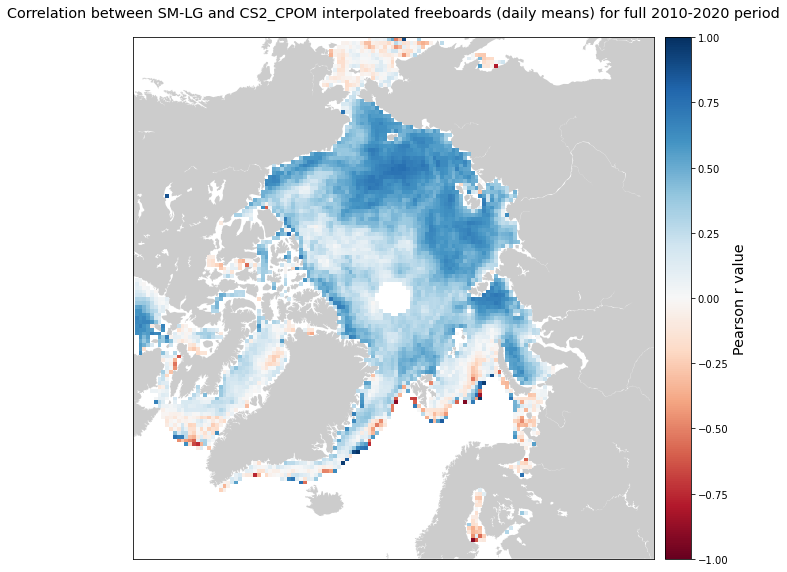

In [5]:
fig,ax = plt.subplots(1,figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=False)
m.fillcontinents(color=(0.8, 0.8, 0.8))
p_map = m.pcolormesh(x_WG,y_WG,rs,cmap='RdBu',vmin=-1,vmax=1)
a = m.colorbar(p_map) 
a.set_label('Pearson r value',fontsize='x-large')
plt.title('Correlation between SM-LG and CS2_CPOM interpolated freeboards (daily means) for full 2010-2020 period',fontsize='x-large', pad=20)

## CS2_Bristol

In [6]:
# import CS2_Bristol data
datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/Bristol_LARM/CS2/freeboard/'
all_fbs_bristol = np.full((4018,160,160), np.nan)
for day in tqdm.tqdm(days):
    date = dates[day].strftime('%Y%m%d')
    for f in os.listdir(datapath):
        if 'FB_interp' in f:
            if date in f:
                all_fbs_bristol[day] = np.load(datapath+str(f))
            else: 
                pass

100%|██████████████████████████████████████| 4018/4018 [00:16<00:00, 250.03it/s]


In [7]:
# pickle.dump((all_fbs_bristol),open('cache1.p','wb')) # cache data so far so if kernel breaks we dont have to reload data                                                        
# (all_fbs_bristol) = pickle.load(open('cache1.p','rb'))

In [8]:
# calculate r for full timeseries per grid cell

rs = np.full((160,160), np.nan)
n_valid = np.full((160,160), np.nan)

for i, j in tqdm.tqdm(itertools.product(np.arange(160),
                              np.arange(160))):  
    
    mask = ~np.isnan(all_fbs_bristol[:,i,j]) & ~np.isnan(snow[:,i,j]) # mask out cells with nan snow or nan freeb
    
    if np.count_nonzero(np.nan_to_num(mask)) > 2: # if more than 2 days in snow and freeb have data then continue
        
            
        rstats = pearsonr(all_fbs_bristol[:,i,j][mask],snow[:,i,j][mask]) # correlate valid snow and freeb for each grid cell 
        r = np.round(rstats[0],decimals=2)
        rs[i,j] = r
        n_valid[i,j] = len(mask[mask]) # number of valid days in time series - where mask is true 

25600it [00:02, 8998.54it/s] 


Text(0.5, 1.0, 'Correlation between SM-LG and CS2_Bristol interpolated freeboards (daily means) for full 2010-2020 period')

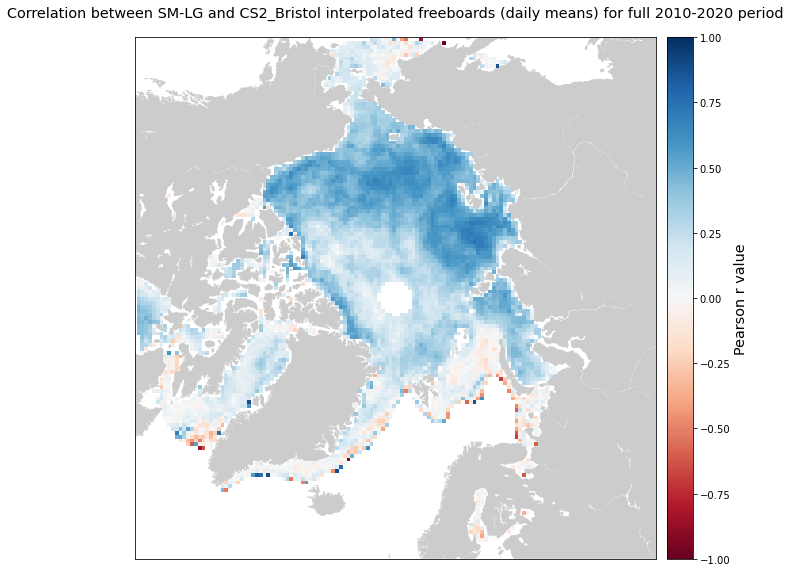

In [9]:
fig,ax = plt.subplots(1,figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='l',round=False)
m.fillcontinents(color=(0.8, 0.8, 0.8))
p_map = m.pcolormesh(x_WG,y_WG,rs,cmap='RdBu',vmin=-1,vmax=1)
a = m.colorbar(p_map) 
a.set_label('Pearson r value',fontsize='x-large')
plt.title('Correlation between SM-LG and CS2_Bristol interpolated freeboards (daily means) for full 2010-2020 period',fontsize='x-large', pad=20)